<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(Adv_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install pylatexenc

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

Run the code using a simulator as follows.

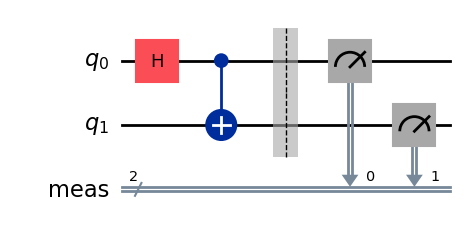

In [14]:
# Create a 2-qubit circuit
circuit = QuantumCircuit(2)
circuit.h(0)  # Apply Hadamard gate
circuit.cx(0, 1)  # Apply CNOT gate
circuit.measure_all()
circuit.draw('mpl')

In [15]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()

In [16]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

In [17]:
# Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])

/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [18]:
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Counts for the meas output register: {'11': 527, '00': 497}


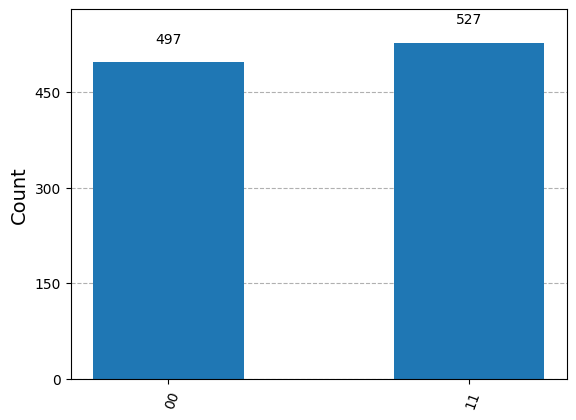

In [19]:
# Display the histogram
plot_histogram(pub_result.data.meas.get_counts())

Run the code on Quantum Computer at IBM as follows.

In [22]:
from google.colab import userdata
ibm_token = userdata.get('ibm_token')

In [23]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=ibm_token
)

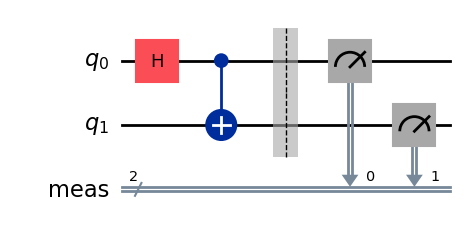

In [24]:
# Create a 2-qubit circuit
circuit = QuantumCircuit(2)
circuit.h(0)  # Apply Hadamard gate
circuit.cx(0, 1)  # Apply CNOT gate
circuit.measure_all()
circuit.draw('mpl')

In [ ]:
# Select the least busy available backend
backend = service.least_busy(operational=True, simulator=False)
print(f"Selected backend: {backend}")

# Transpile the circuit with optimization level 1
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

# Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")

In [25]:
job = service.job('cw0mjxkjz3x0008j6fqg')

In [26]:
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Counts for the meas output register: {'11': 507, '00': 487, '10': 7, '01': 23}


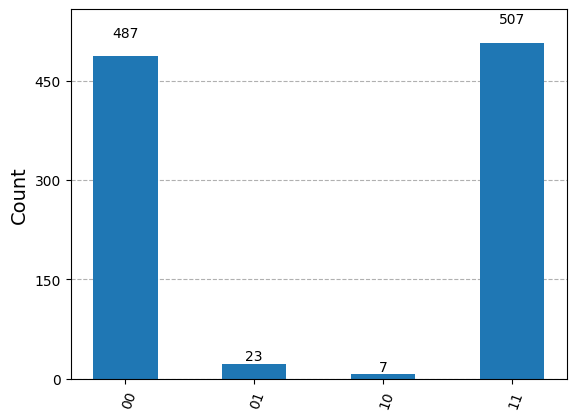

In [27]:
# Display the histogram
plot_histogram(pub_result.data.meas.get_counts())